In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVC , LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , AdaBoostClassifier ,ExtraTreesClassifier 
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb

In [4]:
data = pd.read_csv("diabetes.csv")

In [5]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


>`Column Information`

-`Information` about dataset attributes -

-`Pregnancies`: To express the Number of pregnancies

-`Glucose`: To express the Glucose level in blood

-`BloodPressure`: To express the Blood pressure measurement

-`SkinThickness`: To express the thickness of the skin

-`Insulin`: To express the Insulin level in blood

-`BMI`: To express the Body mass index

-`DiabetesPedigreeFunction`: To express the Diabetes percentage

-`Age`: To express the age

-`Outcome`: To express the final result 1 is Yes and 0 is No

>`Initial information about the dataset~`

-Dataset contains 9 columns & 788 rows 

-All columns are numerical columns

-Dataset Contains No null values , which makes it a clean dataset

In [6]:
data.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

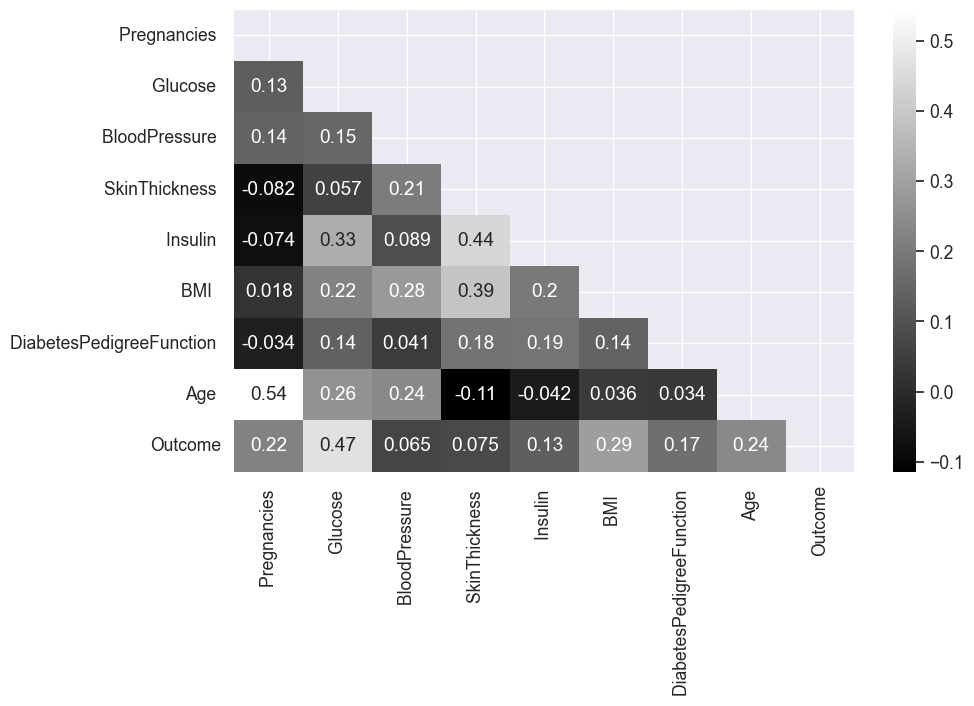

In [7]:
sns.set(font_scale=1.15)
plt.figure(figsize=(10, 6))
crr = data.corr()
mask = np.zeros_like(crr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(crr, annot = True, linecolor = "black",cmap='gist_yarg_r', mask=mask ,cbar=True)
plt.show()

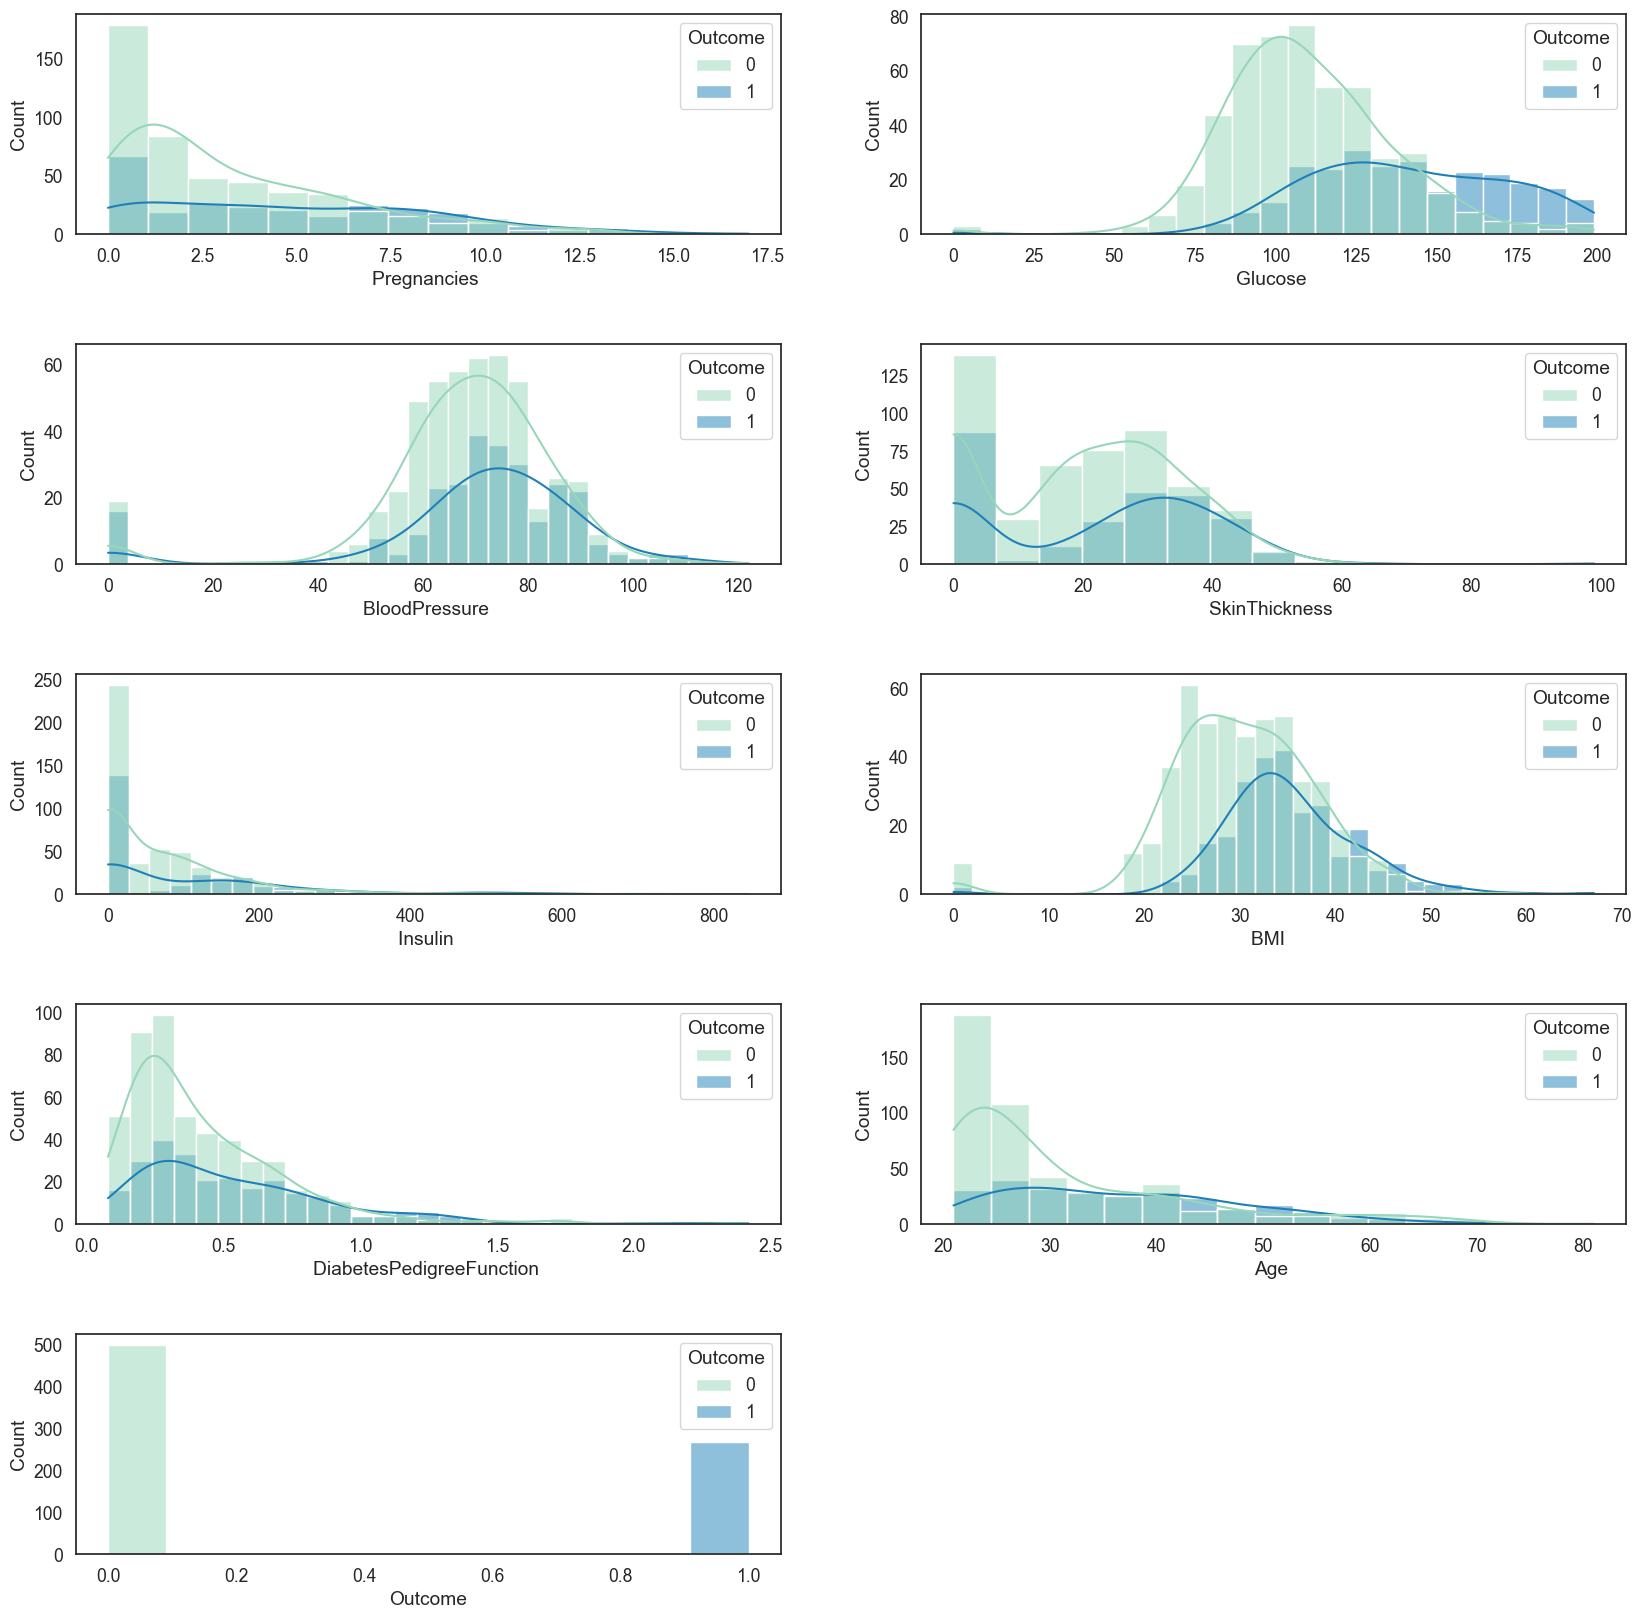

In [8]:
plt.figure(figsize = (20,20))
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in [cname for cname in data.columns]:
    plt.subplot(5,2,i)
    sns.histplot( data=data, x=name, hue="Outcome",kde=True,palette="YlGnBu" )
    i = i + 1

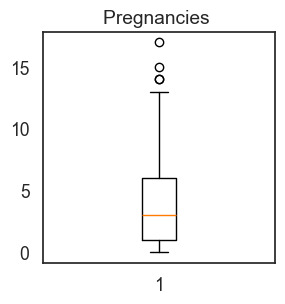

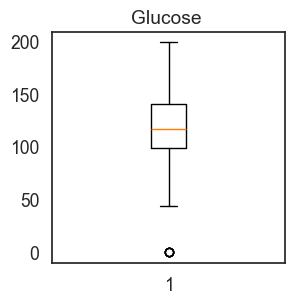

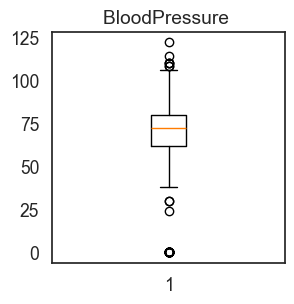

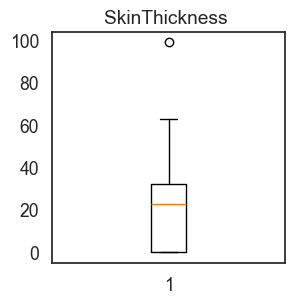

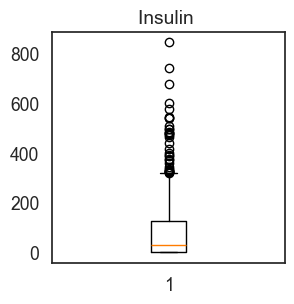

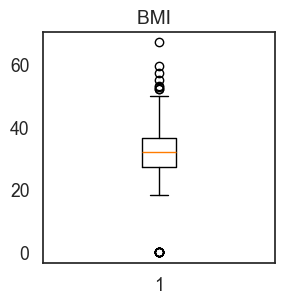

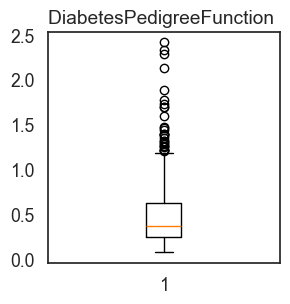

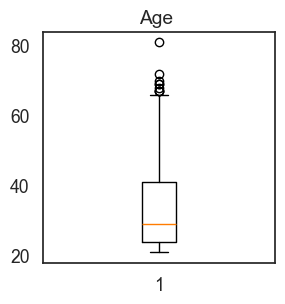

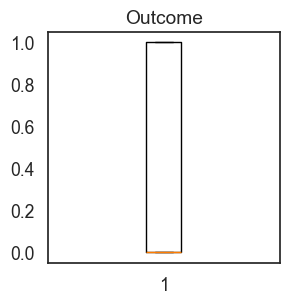

In [9]:
def create_boxplots(df):
    for col in df.columns:
        plt.figure(figsize = (3,3))
        plt.boxplot(df[col])
        plt.title(col)
        plt.show()
create_boxplots(data)

In [10]:
data.columns = data.columns.str.strip()
data.columns
feature_names = [cname for cname in data.loc[:,:'Age'].columns]
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [11]:
import pandas as pd

# Assuming data is your DataFrame and 'Age' is the column you want to modify
# Create a new column 'Age_Brack' with default value 0
data['Age_Brack'] = 0

# Apply conditions and assign appropriate values
data.loc[data['Age'] < 18, 'Age_Brack'] = 1
data.loc[(data['Age'] >= 18) & (data['Age'] <= 30), 'Age_Brack'] = 2
data.loc[(data['Age'] > 30) & (data['Age'] <= 40), 'Age_Brack'] = 3
data.loc[(data['Age'] > 40) & (data['Age'] <= 50), 'Age_Brack'] = 4
data.loc[(data['Age'] > 50) & (data['Age'] <= 60), 'Age_Brack'] = 5
data.loc[(data['Age'] > 60) & (data['Age'] <= 70), 'Age_Brack'] = 6
data.loc[(data['Age'] > 70) & (data['Age'] <= 80), 'Age_Brack'] = 7
data.loc[(data['Age'] > 80) & (data['Age'] <= 150), 'Age_Brack'] = 8

# Print the modified DataFrame
print(data)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  Age_Brack  
0                       0.627   50        1          4

In [12]:
data['Age_Brack'].unique()

array([4, 3, 2, 5, 6, 7, 8], dtype=int64)

In [13]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [14]:
X = data.drop(['Age','Outcome'],axis = 1 )
y = data['Outcome']
X_train , X_test , y_train , y_test = train_test_split(X,y , train_size = 0.7 , random_state = 42 )

In [15]:
from imblearn.over_sampling import SMOTE

# Assuming X_train and y_train are your feature and target training datasets
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [18]:
Final_dataset = pd.DataFrame({'model':[],'accuracy':[],'precision':[],'recall':[],'f1':[]})

#Creating a function 
def ML(model) :
        #Creating a Pipeline
        global Final_dataset
        pipe = Pipeline(
        [
        ('scaler',MinMaxScaler()),
        ('classifier',model)
        ]
        )
        # Fit the pipeline to the data 
        pipe.fit(X_resampled , y_resampled)
        # Make prediction
        y_pred = pipe.predict(X_test)   
       
        #Evaluate the pipeline on the test data 
        accuracy = accuracy_score(y_test , y_pred)
        precision = precision_score(y_test , y_pred)
        recall = recall_score(y_test , y_pred)
        f1 = f1_score(y_test , y_pred)
        model_name = type(model).__name__    # get the string name of the class
        print(model_name)
        # Appending it in the dataframe for models comparison
        new_row = {'model':model_name,'accuracy':accuracy , 'precision':precision,'recall':recall ,'f1': f1 }
        print(new_row)
        Final_dataset = pd.concat([Final_dataset , pd.DataFrame(new_row, index =[0])])  

In [19]:
Log_reg_model = LogisticRegression( )
SVC_Model = SVC()
GaussianNB_Model = GaussianNB()
RandomForest_Model = RandomForestClassifier()
GradientBoosting_Model = GradientBoostingClassifier()
AdaBoost_Model = AdaBoostClassifier()
ExtraTreesClassifier_Model = ExtraTreesClassifier()
XGBClassifier_Model = XGBClassifier()
LightGBM_Model = lgb.LGBMClassifier()

In [20]:
models = [Log_reg_model,SVC_Model,GaussianNB_Model,RandomForest_Model,GradientBoosting_Model,AdaBoost_Model,ExtraTreesClassifier_Model,XGBClassifier_Model,LightGBM_Model]
for model in models :
    ML(model)

LogisticRegression
{'model': 'LogisticRegression', 'accuracy': 0.7056277056277056, 'precision': 0.5588235294117647, 'recall': 0.7125, 'f1': 0.6263736263736264}
SVC
{'model': 'SVC', 'accuracy': 0.7012987012987013, 'precision': 0.5514018691588785, 'recall': 0.7375, 'f1': 0.6310160427807486}
GaussianNB
{'model': 'GaussianNB', 'accuracy': 0.7186147186147186, 'precision': 0.5789473684210527, 'recall': 0.6875, 'f1': 0.6285714285714286}
RandomForestClassifier
{'model': 'RandomForestClassifier', 'accuracy': 0.7272727272727273, 'precision': 0.5858585858585859, 'recall': 0.725, 'f1': 0.6480446927374302}
GradientBoostingClassifier
{'model': 'GradientBoostingClassifier', 'accuracy': 0.7229437229437229, 'precision': 0.58, 'recall': 0.725, 'f1': 0.6444444444444445}
AdaBoostClassifier
{'model': 'AdaBoostClassifier', 'accuracy': 0.7142857142857143, 'precision': 0.574468085106383, 'recall': 0.675, 'f1': 0.6206896551724138}
ExtraTreesClassifier
{'model': 'ExtraTreesClassifier', 'accuracy': 0.72294372294

In [21]:
Final_dataset

,model,accuracy,precision,recall,f1
0,LogisticRegression,0.705628,0.558824,0.7125,0.626374
0,SVC,0.701299,0.551402,0.7375,0.631016
0,GaussianNB,0.718615,0.578947,0.6875,0.628571
0,RandomForestClassifier,0.727273,0.585859,0.7250,0.648045
0,GradientBoostingClassifier,0.722944,0.580000,0.7250,0.644444
0,AdaBoostClassifier,0.714286,0.574468,0.6750,0.620690
0,ExtraTreesClassifier,0.722944,0.586957,0.6750,0.627907
0,XGBClassifier,0.688312,0.538462,0.7000,0.608696
0,LGBMClassifier,0.709957,0.564356,0.7125,0.629834


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU ,PReLU , LeakyReLU , ELU 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
mmc = MinMaxScaler()
X_train = mmc.fit_transform(X_train)
X_test = mmc.transform(X_test)

In [24]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((537, 8), (537,)), ((231, 8), (231,)))

In [25]:
early_stopping = EarlyStopping(monitor = 'accuracy' , patience = 10  ,restore_best_weights = True )

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1,activation = 'sigmoid')  # Classification output
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss = 'binary_crossentropy', metrics=['accuracy'])

model.history = model.fit(X_resampled , y_resampled, epochs = 50 ,callbacks = [early_stopping])

Epoch 1/50
22/22 [==============================] - 2s 5ms/step - loss: 1.7676 - accuracy: 0.5358
Epoch 2/50
22/22 [==============================] - 0s 3ms/step - loss: 0.9530 - accuracy: 0.5702
Epoch 3/50
22/22 [==============================] - 0s 3ms/step - loss: 0.7496 - accuracy: 0.5888
Epoch 4/50
22/22 [==============================] - 0s 3ms/step - loss: 0.6536 - accuracy: 0.6562
Epoch 5/50
22/22 [==============================] - 0s 3ms/step - loss: 0.6787 - accuracy: 0.6662
Epoch 6/50
22/22 [==============================] - 0s 5ms/step - loss: 0.6370 - accuracy: 0.6461
Epoch 7/50
22/22 [==============================] - 0s 3ms/step - loss: 0.6634 - accuracy: 0.6691
Epoch 8/50
22/22 [==============================] - 0s 3ms/step - loss: 0.6692 - accuracy: 0.6605
Epoch 9/50
22/22 [==============================] - 0s 3ms/step - loss: 0.5968 - accuracy: 0.6834
Epoch 10/50
22/22 [==============================] - 0s 3ms/step - loss: 0.6019 - accuracy: 0.6834
Epoch 11/50
22/22 [

In [32]:
y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.3).astype(int) # I am keeping the threshold at 75% , above this the model will classify the out out as positive otherwise negative

8/8 [==============================] - 0s 10ms/step


In [33]:
accuracy = accuracy_score(y_test , y_pred)
precision = precision_score(y_test , y_pred)
recall = recall_score(y_test , y_pred)
f1 = f1_score(y_test , y_pred)


new_row = {'model':'ANN(5-Hidden)(0.7Cutoff)','accuracy':accuracy , 'precision':precision,'recall':recall ,'f1': f1 }
print(new_row)
Final_dataset = pd.concat([Final_dataset , pd.DataFrame(new_row, index =[0])]) 

{'model': 'ANN(5-Hidden)(0.7Cutoff)', 'accuracy': 0.3463203463203463, 'precision': 0.3463203463203463, 'recall': 1.0, 'f1': 0.5144694533762058}


In [34]:
Final_models_summary = Final_dataset

In [35]:
Final_models_summary

,model,accuracy,precision,recall,f1
0,LogisticRegression,0.705628,0.558824,0.7125,0.626374
0,SVC,0.701299,0.551402,0.7375,0.631016
0,GaussianNB,0.718615,0.578947,0.6875,0.628571
0,RandomForestClassifier,0.727273,0.585859,0.7250,0.648045
0,GradientBoostingClassifier,0.722944,0.580000,0.7250,0.644444
0,AdaBoostClassifier,0.714286,0.574468,0.6750,0.620690
0,ExtraTreesClassifier,0.722944,0.586957,0.6750,0.627907
0,XGBClassifier,0.688312,0.538462,0.7000,0.608696
0,LGBMClassifier,0.709957,0.564356,0.7125,0.629834
0,ANN(5-Hidden)(0.7Cutoff),0.653680,0.000000,0.0000,0.000000


In [36]:
model.save('ANN_Model.h5')

In [37]:
X_test[1]

array([0.11764706, 0.56281407, 0.6147541 , 0.50793651, 0.        ,
       0.53204173, 0.02988898, 0.        ])

In [38]:
val = model.predict([[0.11764706, 0.56281407, 0.6147541 , 0.50793651, 0,
       0.53204173, 0.02988898, 0]])

val_class = (val >= 0.7).astype(int)
val_class

1/1 [==============================] - 0s 76ms/step


array([[0]])